In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

import os
import sys 
sys.path.append(os.path.abspath("../../../src"))   
import soporte_preprocesamiento as f
import warnings
warnings.filterwarnings("ignore")

import json
from datetime import datetime

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.2f}".format 

## Este grupo de clientes es el 2, lo que parecen clientes agrupados por una localización geográfica específica (Ej: New York o United States). En definitiva, este cluster agrupa los clientes que se ubican en ciudades/países de donde se reciben muchas órdenes.  Además son lo que compran las subcategorías más frecuentes (Ej: paper).  

In [2]:
df_crudo=pd.read_csv("..\..\..\datos\datos2\datos_clusterizados2.csv")


In [3]:
df_crudo.head()

,customer_ID,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,cluster
0,JR-16210,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709.39",entre 9 y 10,0.10,-288.76,923.63,Critical,2
1,RH-9495,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,832.96",entre 7 y 8,0.00,311.52,903.04,Critical,2
2,TS-21340,30570,IN-2011-81826,07-11-2011,09-11-2011,First Class,Toby Swindell,Consumer,Porirua,Wellington,New Zealand,APAC,Oceania,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable","1,822.08",entre 3 y 4,0.00,564.84,894.77,Critical,2
3,MB-18085,31192,IN-2012-86369,14-04-2012,18-04-2012,Standard Class,Mick Brown,Consumer,Hamilton,Waikato,New Zealand,APAC,Oceania,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled","5,244.84",entre 5 y 6,0.00,996.48,878.38,High,2
4,JW-15220,40155,CA-2014-135909,14-10-2014,21-10-2014,Standard Class,Jane Waco,Corporate,Sacramento,California,United States,US,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,"5,083.96",entre 5 y 6,0.20,"1,906.48",867.69,Low,2


In [4]:
f.exploracion_dataframe(df_crudo, "Sales", estadisticos = False)

El número de datos es 37669 y el de columnas es 24

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
customer_ID,object
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer Name,object
Segment,object
City,object
State,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna CUSTOMER_ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1588 categorías (5/1588)


,count
customer_ID,
PO-18850,76
EM-13960,72
JG-15805,71
MP-17965,70
BE-11335,69


La columna ORDER ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 18447 categorías (5/18447)


,count
Order ID,
TO-2014-9950,13
NI-2014-8880,13
IN-2013-42311,13
MX-2014-166541,13
MX-2013-127705,12


La columna ORDER DATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1414 categorías (5/1414)


,count
Order Date,
18-11-2014,109
18-06-2014,107
29-12-2014,91
13-11-2014,91
12-11-2014,90


La columna SHIP DATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1463 categorías (5/1463)


,count
Ship Date,
22-11-2014,106
07-12-2014,89
16-11-2014,85
17-11-2014,78
23-06-2014,76


La columna SHIP MODE tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
Ship Mode,
Standard Class,22493
Second Class,7776
First Class,5437
Same Day,1963


La columna CUSTOMER NAME tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 795 categorías (5/795)


,count
Customer Name,
Muhammed Yedwab,86
Natalie Fritzler,85
Rob Dowd,85
Harry Greene,84
Gary Hwang,82


La columna SEGMENT tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
Segment,
Consumer,19489
Corporate,11367
Home Office,6813


La columna CITY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 3587 categorías (5/3587)


,count
City,
Hamburg,133
Wollongong,131
Newcastle,130
Jacksonville,125
Detroit,115


La columna STATE tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 1076 categorías (5/1076)


,count
State,
England,1242
Ile-de-France,794
North Rhine-Westphalia,719
California,574
New South Wales,510


La columna COUNTRY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 145 categorías (5/145)


,count
Country,
United States,5453
France,2640
Mexico,2344
China,1880
Germany,1848


La columna MARKET tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 7 categorías (5/7)


,count
Market,
EU,8713
APAC,7896
LATAM,7325
US,5453
EMEA,4348


La columna REGION tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 13 categorías (5/13)


,count
Region,
Central,7805
South,5891
EMEA,4348
North,4104
Africa,3574


La columna PRODUCT ID tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9966 categorías (5/9966)


,count
Product ID,
OFF-AR-10003651,29
OFF-AR-10003829,25
OFF-BI-10002799,25
OFF-BI-10002570,24
OFF-BI-10003708,23


La columna CATEGORY tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
Category,
Office Supplies,23181
Technology,7395
Furniture,7093


La columna SUB-CATEGORY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


,count
Sub-Category,
Binders,4550
Storage,3895
Art,3747
Chairs,2453
Phones,2414


La columna PRODUCT NAME tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 3669 categorías (5/3669)


,count
Product Name,
Staples,126
"Cardinal Index Tab, Clear",74
"Eldon File Cart, Single Width",73
"Smead File Cart, Single Width",68
"Rogers File Cart, Single Width",66


La columna QUANTITY tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 8 categorías (5/8)


,count
Quantity,
entre 1 y 2,16347
entre 3 y 4,11538
entre 5 y 6,5704
entre 7 y 8,2733
entre 9 y 10,912


La columna ORDER PRIORITY tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
Order Priority,
Medium,21578
High,11419
Critical,2944
Low,1728



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
Row ID,"37,669.00","25,404.35","15,019.68",2.00,"12,646.00","24,453.00","39,218.00","51,289.00"
Sales,"37,669.00",250.11,488.75,0.56,32.33,88.70,255.78,"22,638.48"
Discount,"37,669.00",0.13,0.21,0.00,0.00,0.00,0.20,0.85
Profit,"37,669.00",32.33,177.34,"-6,599.98",0.78,10.62,40.80,"8,399.98"
Shipping Cost,"37,669.00",26.75,57.32,0.00,2.78,8.13,24.89,923.63
cluster,"37,669.00",2.00,0.00,2.00,2.00,2.00,2.00,2.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
customer_ID,37669,1588,PO-18850,76
Order ID,37669,18447,TO-2014-9950,13
Order Date,37669,1414,18-11-2014,109
Ship Date,37669,1463,22-11-2014,106
Ship Mode,37669,4,Standard Class,22493
Customer Name,37669,795,Muhammed Yedwab,86
Segment,37669,3,Consumer,19489
City,37669,3587,Hamburg,133
State,37669,1076,England,1242
Country,37669,145,United States,5453



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37669 entries, 0 to 37668
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_ID     37669 non-null  object 
 1   Row ID          37669 non-null  int64  
 2   Order ID        37669 non-null  object 
 3   Order Date      37669 non-null  object 
 4   Ship Date       37669 non-null  object 
 5   Ship Mode       37669 non-null  object 
 6   Customer Name   37669 non-null  object 
 7   Segment         37669 non-null  object 
 8   City            37669 non-null  object 
 9   State           37669 non-null  object 
 10  Country         37669 non-null  object 
 11  Market          37669 non-null  object 
 12  Region          37669 non-null  object 
 13  Product ID      37669 non-null  object 
 14  Category        37669 non-null  object 
 15  Sub-Category    37669 non-null  object 
 16  Product Name

None

### Eliminamos las columnas que no se consideran importantes

In [5]:
df_crudo.head(1)

,customer_ID,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,cluster
0,JR-16210,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709.39",entre 9 y 10,0.10,-288.76,923.63,Critical,2


In [6]:
lista_eliminar0=["customer_ID", "Row ID", "Order ID", "Ship Date", "Customer Name", "State", "Market", "Region", "Product ID", "Product Name", "Profit", "Shipping Cost", "cluster"]

In [7]:
df_crudo.drop(columns=lista_eliminar0, inplace=True)

In [10]:
df_crudo.head(4)

,Order Date,Ship Mode,Segment,City,Country,Category,Sub-Category,Sales,Quantity,Discount,Order Priority
0,05-02-2013,Second Class,Corporate,Wollongong,Australia,Furniture,Chairs,"3,709.39",entre 9 y 10,0.10,Critical
1,05-11-2013,Same Day,Consumer,Dakar,Senegal,Technology,Copiers,"2,832.96",entre 7 y 8,0.00,Critical
2,07-11-2011,First Class,Consumer,Porirua,New Zealand,Furniture,Chairs,"1,822.08",entre 3 y 4,0.00,Critical
3,14-04-2012,Standard Class,Consumer,Hamilton,New Zealand,Furniture,Tables,"5,244.84",entre 5 y 6,0.00,High


### Formateamos order date para sacar el month y eliminamos Order date

In [11]:
df_crudo["Order Date"]= pd.to_datetime(df_crudo['Order Date'], format="%d-%m-%Y")

In [12]:
df_crudo["month"]=df_crudo["Order Date"].dt.month_name()

In [14]:
df_crudo.head(1)

,Order Date,Ship Mode,Segment,City,Country,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month
0,2013-02-05,Second Class,Corporate,Wollongong,Australia,Furniture,Chairs,"3,709.39",entre 9 y 10,0.10,Critical,February


In [15]:
df_crudo.drop(columns="Order Date", inplace=True)

In [16]:
df_crudo.head(1)

,Ship Mode,Segment,City,Country,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month
0,Second Class,Corporate,Wollongong,Australia,Furniture,Chairs,"3,709.39",entre 9 y 10,0.10,Critical,February


### *Duplicados*

In [17]:
df_crudo[df_crudo.duplicated()]

,Ship Mode,Segment,City,Country,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month
4606,Standard Class,Corporate,Rancagua,Chile,Furniture,Chairs,615.24,entre 1 y 2,0.00,Medium,December
28303,Standard Class,Home Office,Oran,Algeria,Technology,Accessories,56.76,entre 1 y 2,0.00,High,August
29194,Second Class,Corporate,Alexandria,United States,Office Supplies,Art,22.96,entre 7 y 8,0.00,High,April
29319,Second Class,Home Office,Thika,Kenya,Office Supplies,Envelopes,20.49,entre 1 y 2,0.00,High,February
31171,Standard Class,Consumer,Mechelen,Belgium,Office Supplies,Art,37.08,entre 3 y 4,0.00,Medium,August
34975,Same Day,Consumer,Newcastle,Australia,Office Supplies,Art,23.44,entre 1 y 2,0.10,Medium,June
35809,Standard Class,Consumer,Armidale,Australia,Office Supplies,Binders,15.39,entre 3 y 4,0.10,Medium,May


In [18]:
df_crudo.drop_duplicates(inplace=True)
df_crudo.reset_index(drop=True, inplace=True)

In [19]:
df_crudo.duplicated().sum()

0

Como es muy raro que una orden sea exactamente igual a otra y dado que solo hay 7, decido eliminar los duplicados

In [20]:
df_crudo["Discount"].unique()

array([0.1  , 0.   , 0.2  , 0.4  , 0.15 , 0.3  , 0.5  , 0.17 , 0.47 ,
       0.002, 0.07 , 0.7  , 0.35 , 0.6  , 0.65 , 0.25 , 0.27 , 0.8  ,
       0.202, 0.57 , 0.55 , 0.402, 0.45 , 0.37 , 0.32 , 0.602, 0.85 ])

### Convierto Sales en Sales unitario porque le veo más sentido a que me dé el agregado

In [21]:
df_crudo["Quantity_mean"] = df_crudo["Quantity"].str.extract(r"(\d+)\D+(\d+)").astype(float).mean(axis=1)
df_crudo["Sales_unitario"] = df_crudo["Sales"] / df_crudo["Quantity_mean"]
df_crudo.head()

,Ship Mode,Segment,City,Country,Category,Sub-Category,Sales,Quantity,Discount,Order Priority,month,Quantity_mean,Sales_unitario
0,Second Class,Corporate,Wollongong,Australia,Furniture,Chairs,"3,709.39",entre 9 y 10,0.10,Critical,February,9.50,390.46
1,Same Day,Consumer,Dakar,Senegal,Technology,Copiers,"2,832.96",entre 7 y 8,0.00,Critical,November,7.50,377.73
2,First Class,Consumer,Porirua,New Zealand,Furniture,Chairs,"1,822.08",entre 3 y 4,0.00,Critical,November,3.50,520.59
3,Standard Class,Consumer,Hamilton,New Zealand,Furniture,Tables,"5,244.84",entre 5 y 6,0.00,High,April,5.50,953.61
4,Standard Class,Corporate,Sacramento,United States,Office Supplies,Binders,"5,083.96",entre 5 y 6,0.20,Low,October,5.50,924.36


In [22]:
df_crudo.drop(columns=["Sales", "Quantity_mean"], inplace=True)

### Vamos a hacer algunas visualizaciones

In [23]:
visualizador=f.Visualizador(df_crudo)

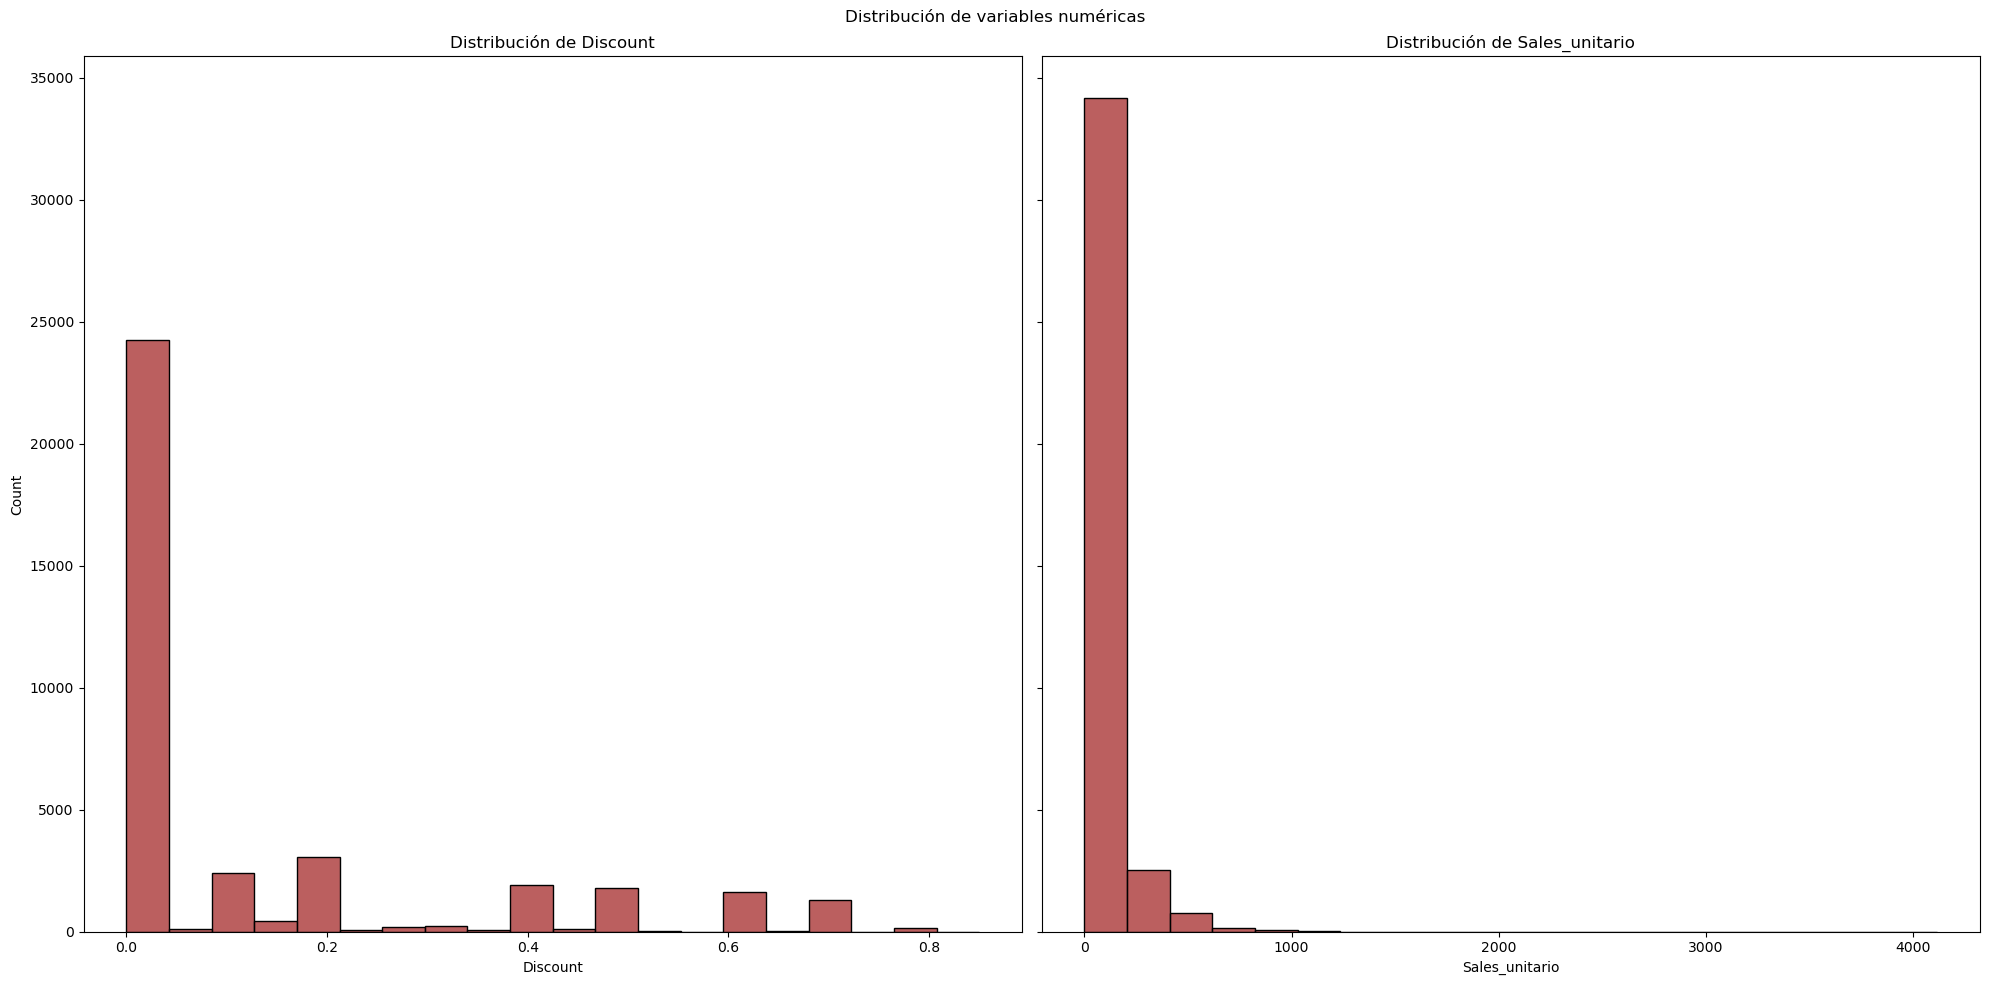

In [24]:
visualizador.plot_numericas(color="brown")

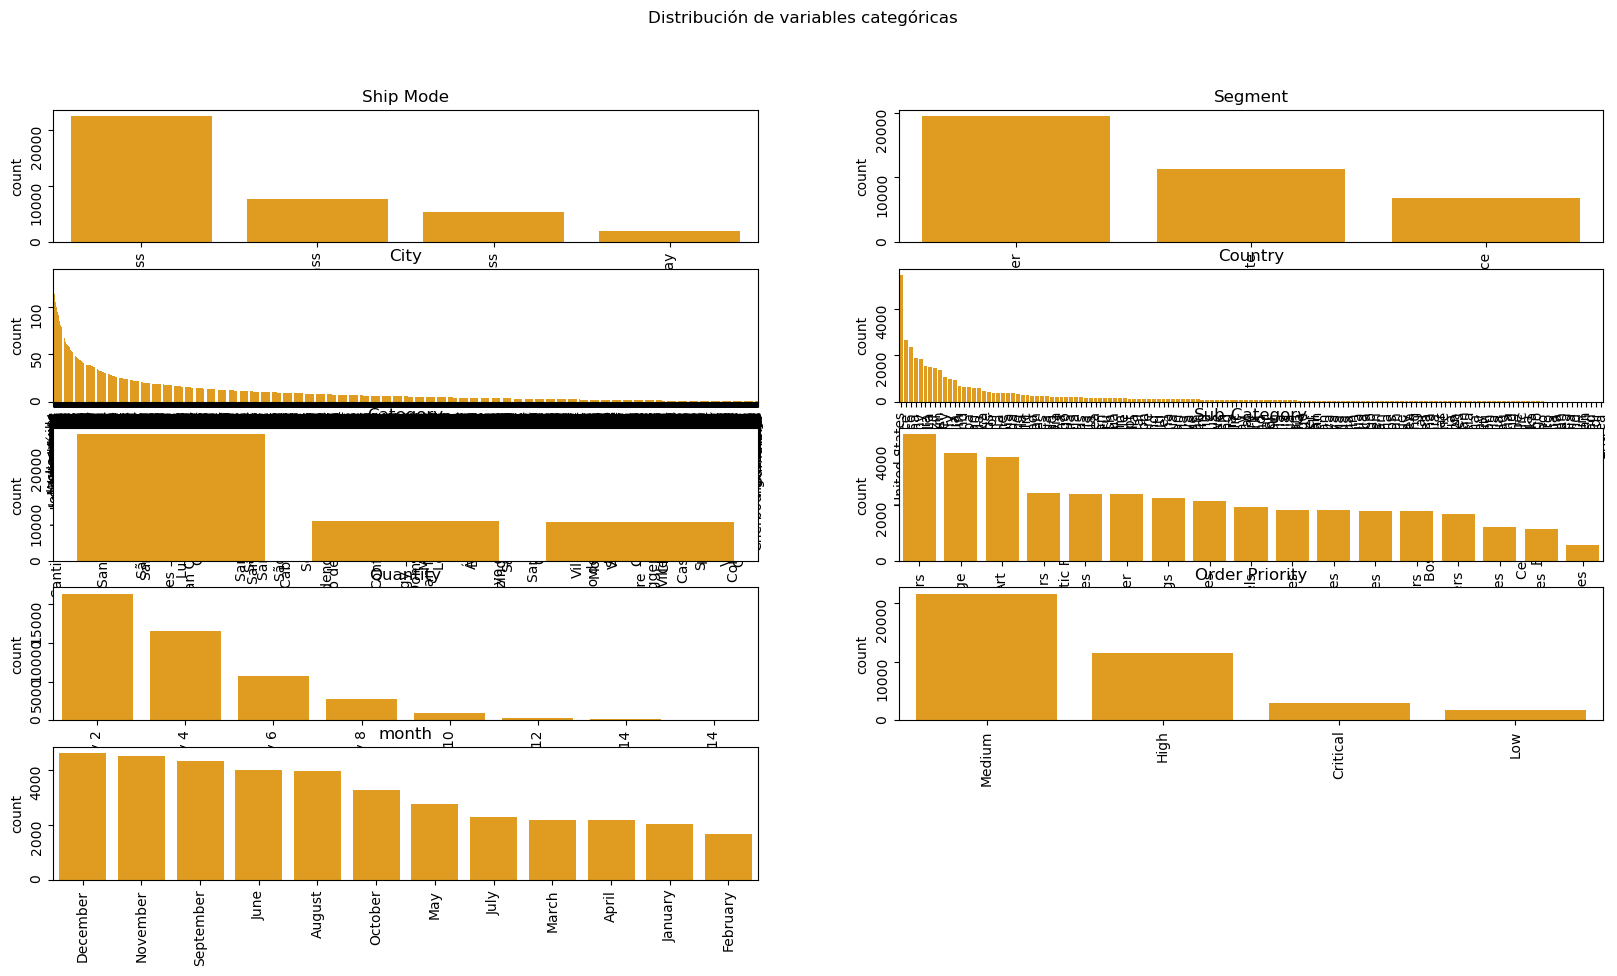

In [25]:
visualizador.plot_categoricas(color="orange")

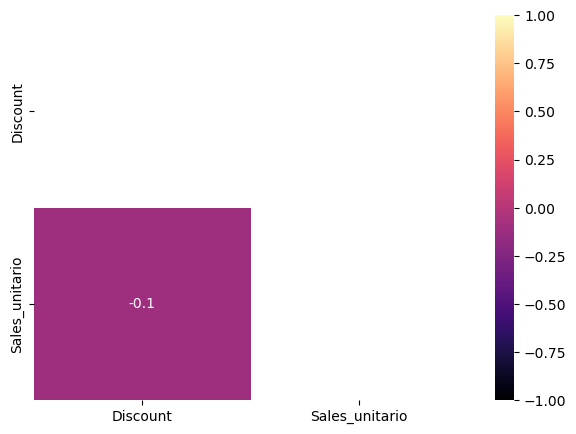

In [26]:
visualizador.correlacion()

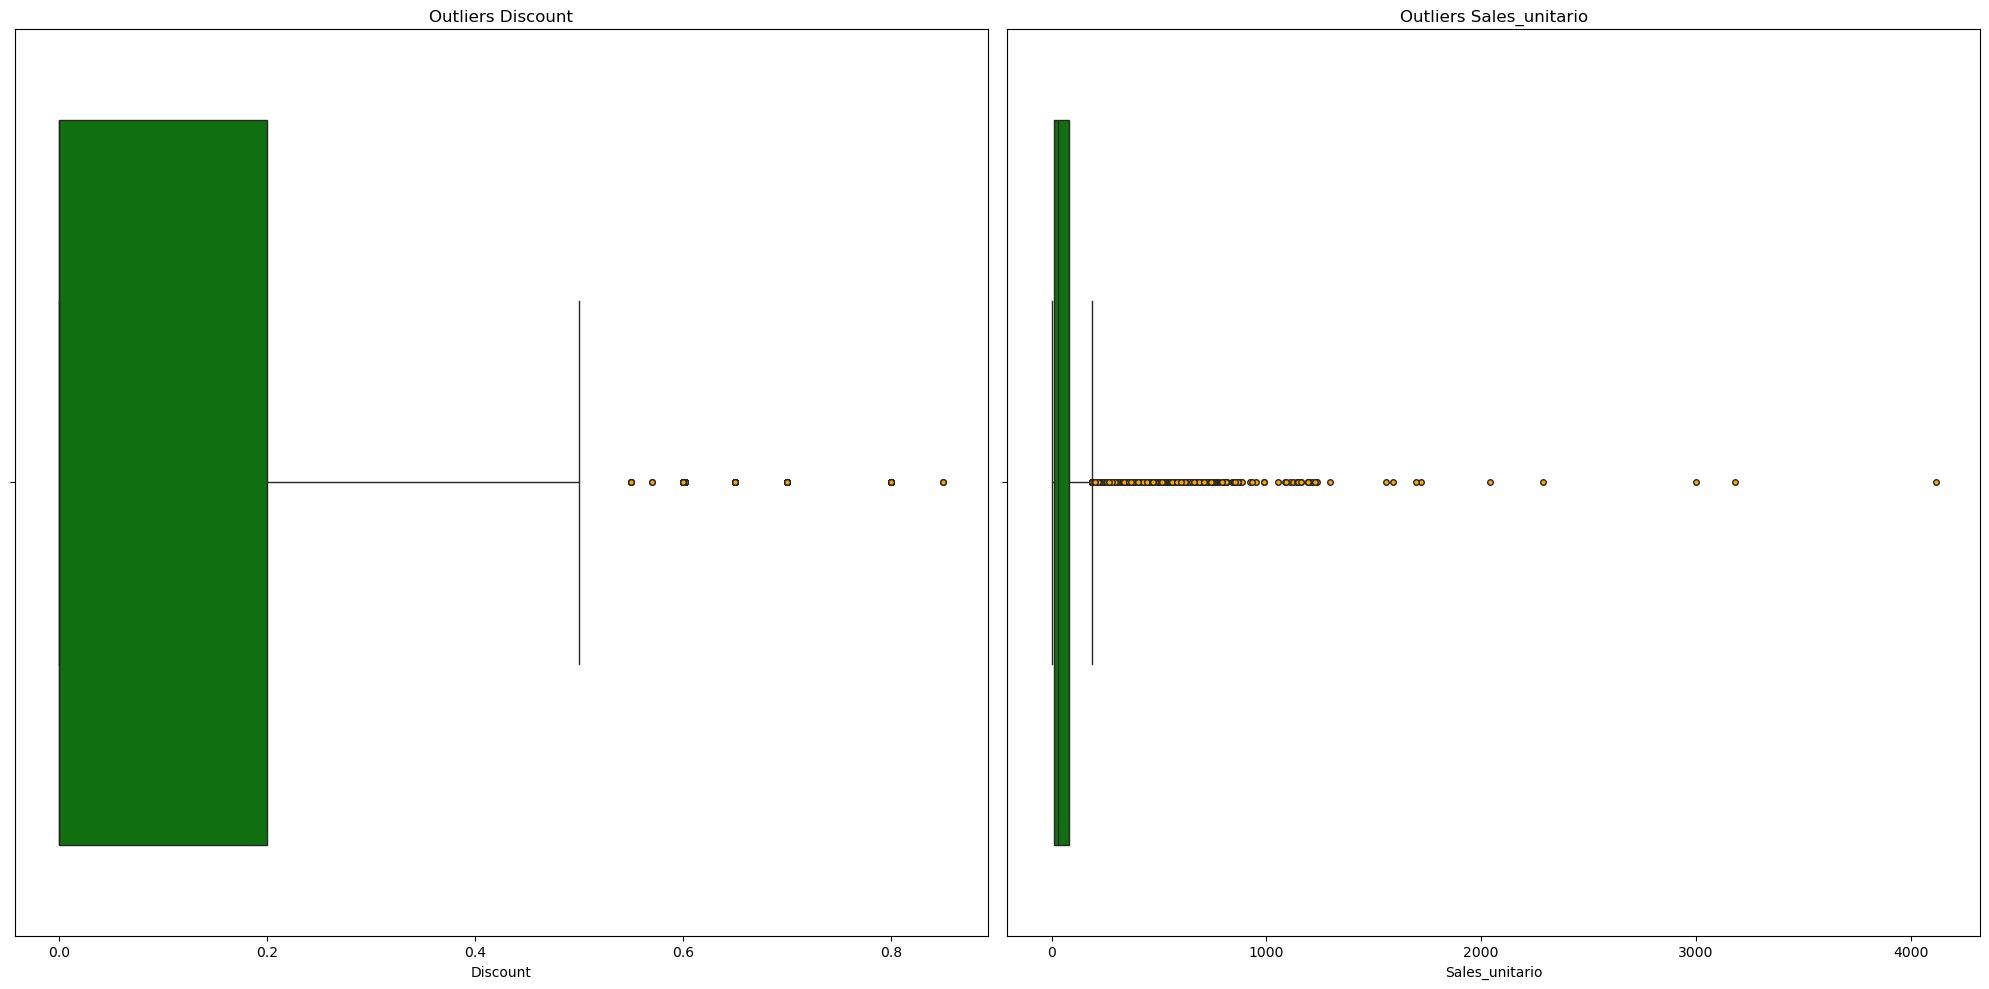

In [27]:
visualizador.deteccion_outliers(color="green")

### Comprobación de los outliers 

In [31]:
df_crudo[df_crudo["Sales_unitario"] > 1000]

,Ship Mode,Segment,City,Country,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
19,First Class,Corporate,Taipei,Taiwan,Furniture,Tables,entre 1 y 2,0.00,Critical,December,"1,143.44"
26,Same Day,Corporate,Burlington,United States,Technology,Machines,entre 3 y 4,0.50,High,November,"2,285.71"
32,Standard Class,Consumer,Minneapolis,United States,Office Supplies,Binders,entre 5 y 6,0.00,Medium,September,"1,718.17"
42,Second Class,Corporate,Delhi,India,Furniture,Tables,entre 1 y 2,0.00,Critical,May,"1,163.56"
58,Standard Class,Consumer,Atlanta,United States,Office Supplies,Binders,entre 5 y 6,0.00,Medium,March,"1,155.45"
64,Second Class,Consumer,Jackson,United States,Office Supplies,Binders,entre 3 y 4,0.00,High,January,"1,555.42"
72,Same Day,Corporate,Newcastle,Australia,Furniture,Tables,entre 1 y 2,0.00,High,May,"1,231.68"
83,Standard Class,Corporate,Lakewood,United States,Technology,Machines,entre 7 y 8,0.00,Medium,April,"1,213.32"
113,First Class,Corporate,Detroit,United States,Technology,Machines,entre 1 y 2,0.10,Medium,January,"2,039.99"
142,Second Class,Home Office,North Las Vegas,United States,Office Supplies,Binders,entre 3 y 4,0.20,Medium,October,"1,295.99"


In [38]:
df_crudo[df_crudo["Sales_unitario"] > 2000]

,Ship Mode,Segment,City,Country,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
26,Same Day,Corporate,Burlington,United States,Technology,Machines,entre 3 y 4,0.50,High,November,"2,285.71"
113,First Class,Corporate,Detroit,United States,Technology,Machines,entre 1 y 2,0.10,Medium,January,"2,039.99"
207,Standard Class,Consumer,Newark,United States,Technology,Copiers,entre 3 y 4,0.00,Medium,November,"2,999.99"
236,Standard Class,Corporate,Lafayette,United States,Technology,Copiers,entre 5 y 6,0.00,Medium,October,"3,181.81"
9604,Standard Class,Home Office,Jacksonville,United States,Technology,Machines,entre 5 y 6,0.50,Medium,March,"4,116.09"


In [32]:
df_crudo[df_crudo["Sales_unitario"] > 300].sample(3)

,Ship Mode,Segment,City,Country,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
4070,First Class,Consumer,Wuppertal,Germany,Furniture,Bookcases,entre 1 y 2,0.10,Medium,December,467.75
711,Standard Class,Corporate,Kunming,China,Furniture,Bookcases,entre 5 y 6,0.00,Medium,May,449.18
6065,Second Class,Consumer,Vancouver,Canada,Furniture,Chairs,entre 1 y 2,0.00,Medium,August,306.42


In [33]:
df_crudo[df_crudo["Sales_unitario"] < 300].sample(3)

,Ship Mode,Segment,City,Country,Category,Sub-Category,Quantity,Discount,Order Priority,month,Sales_unitario
20702,Standard Class,Corporate,New Bedford,United States,Office Supplies,Binders,entre 9 y 10,0.00,High,August,5.49
3130,Standard Class,Consumer,Hefei,China,Office Supplies,Storage,entre 5 y 6,0.00,Medium,February,215.44
14553,Second Class,Consumer,Lanzhou,China,Office Supplies,Paper,entre 3 y 4,0.00,High,June,33.98


In [34]:
(df_crudo["Sales_unitario"] <300).sum()

35753

In [35]:
(df_crudo["Sales_unitario"] >300).sum()

1909

In [36]:
df_crudo.shape

(37662, 11)

In [37]:
df_crudo.to_csv("..\..\..\datos\datos2\datos_clusterizados2_sin_nulos.csv")